In [100]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px

In [101]:
lf = pd.read_csv("https://vincentarelbundock.github.io/Rdatasets/csv/sampleSelection/Mroz87.csv", index_col=0)
print(lf.head())
lf_worked = lf[lf['hours'] > 0]

          lfp  hours  kids5  kids618  age  educ    wage  repwage  hushrs  \
rownames                                                                   
1           1   1610      1        0   32    12  3.3540     2.65    2708   
2           1   1656      0        2   30    12  1.3889     2.65    2310   
3           1   1980      1        3   35    12  4.5455     4.04    3072   
4           1    456      0        3   34    12  1.0965     3.25    1920   
5           1   1568      1        2   31    14  4.5918     3.60    2000   

          husage  ...  faminc     mtr  motheduc  fatheduc  unem  city  exper  \
rownames          ...                                                          
1             34  ...   16310  0.7215        12         7   5.0     0     14   
2             30  ...   21800  0.6615         7         7  11.0     1      5   
3             40  ...   21040  0.6915        12         7   5.0     0     15   
4             53  ...    7300  0.7815         7         7   5.0    

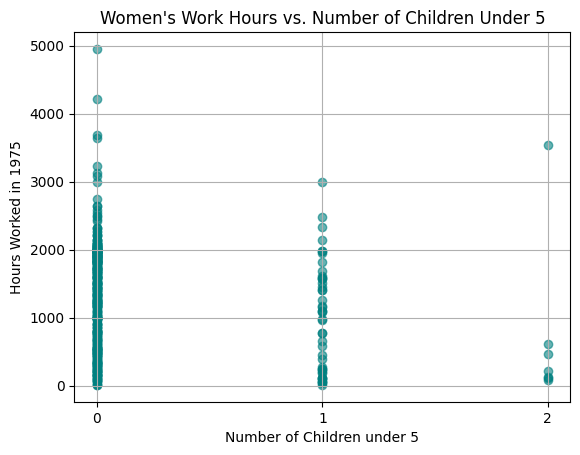

In [102]:
plt.scatter(lf_worked['kids5'], lf_worked['hours'], alpha=0.6, color='teal')
plt.title("Women's Work Hours vs. Number of Children Under 5")
plt.xlabel("Number of Children under 5")
plt.xticks(range(0, 3, 1))
plt.ylabel("Hours Worked in 1975")
plt.grid(True)
plt.show()

/tmp/ipykernel_17029/683308478.py:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




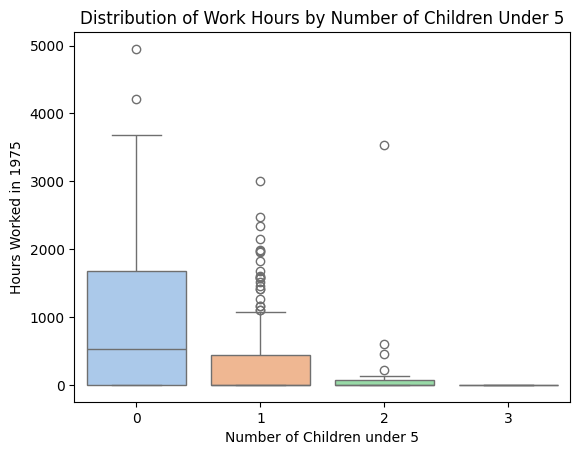

In [103]:
sns.boxplot(x='kids5', y='hours', data=lf, palette="pastel")
plt.title("Distribution of Work Hours by Number of Children Under 5")
plt.xlabel("Number of Children under 5")
plt.ylabel("Hours Worked in 1975")
plt.show()

In [104]:
fig = px.scatter(lf, x="kids5", y="hours", color="faminc", title="Women's Work Hours vs. Number of Children Under 5", labels={'kids5':'Number of Children Under 5', 'hours':'Hours Worked in 1975'}, hover_data=['age','educ','wage'])
fig.show()


New Content to add: Aggregate Data and plot.

In [105]:
agg_lf = lf.groupby('motheduc').agg({       
    'wage': 'mean'    # average wage per category
})

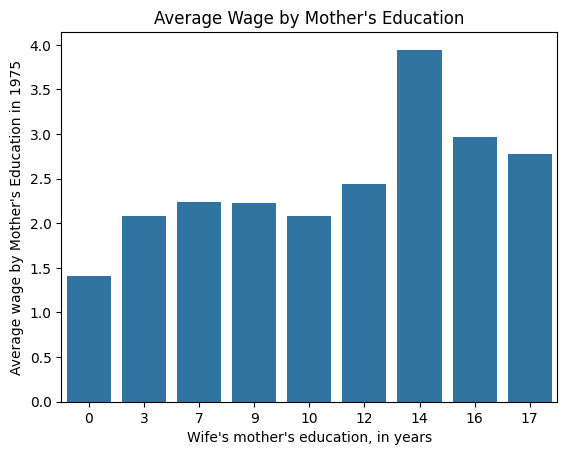

In [106]:
sns.barplot(data=agg_lf.reset_index(), x='motheduc', y='wage')
plt.title("Average Wage by Mother's Education")
plt.xlabel("Wife's mother's education, in years")
plt.ylabel("Average wage by Mother's Education in 1975")
plt.show()

Histogram

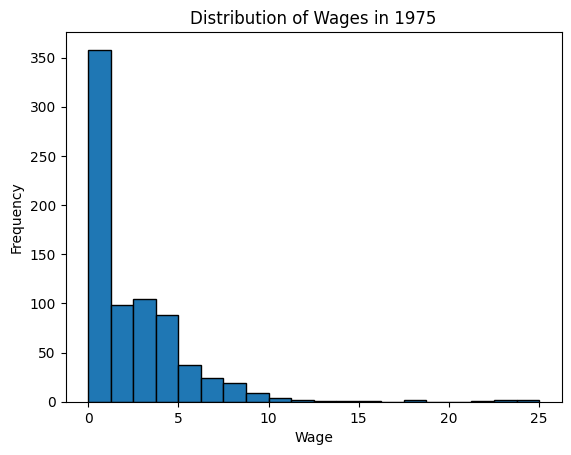

In [107]:
plt.hist(lf['wage'], bins=20, edgecolor='black')  # adjust bins as needed
plt.xlabel('Wage')
plt.ylabel('Frequency')
plt.title('Distribution of Wages in 1975')
plt.show()

Line plot 

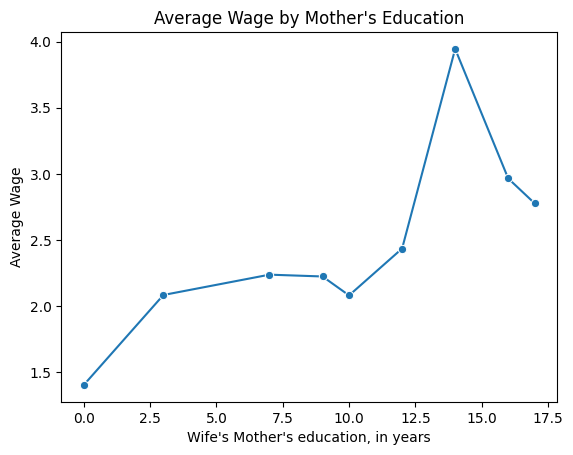

In [108]:
sns.lineplot(data=agg_lf, x='motheduc', y='wage', marker='o')
plt.title("Average Wage by Mother's Education")
plt.xlabel("Wife's Mother's education, in years")
plt.ylabel("Average Wage")
plt.show()

Scatterplot

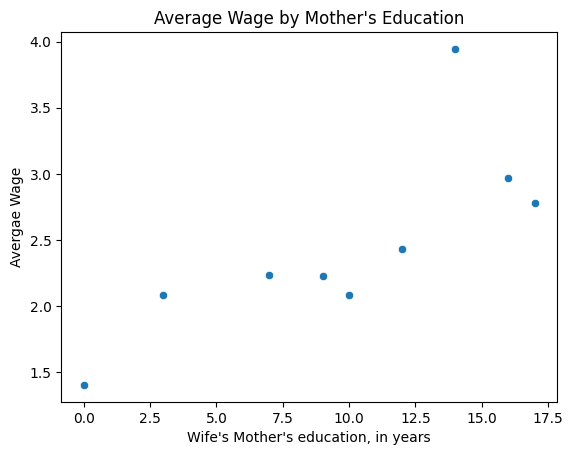

In [109]:
sns.scatterplot(data=agg_lf, x='motheduc', y='wage')
plt.title("Average Wage by Mother's Education")
plt.xlabel("Wife's Mother's education, in years")
plt.ylabel("Avergae Wage")
plt.show()

 Run Random forest model using LFP as Dependent variable. Determine the top three most important variables that affect female labor force participation in the dataset. When complete, commit changes and psuh to online version of github repo. 

In [110]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix 

In [111]:
#Setting up the data 
df= lf.copy()

# Convert boolean columns to 0/1
bool_cols = ['wifecoll', 'huscoll']
for col in bool_cols:
    df[col] = df[col].map({'TRUE': 1, 'FALSE': 0})

target = 'lfp'
X = df.drop(columns=[target])
y = df[target]

Splitting the data into two sections.  
Training set: used to fit the model.
Test set: used to check how well the model generalizes to new data.

In [112]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.75, random_state=42
)

Training the Random Forest Classifier. Using 100 trees

In [113]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


Evaluation


In [114]:
#Accuracy  
y_pred = rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9946902654867257
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       239
           1       1.00      0.99      1.00       326

    accuracy                           0.99       565
   macro avg       0.99      1.00      0.99       565
weighted avg       0.99      0.99      0.99       565

Confusion Matrix:
 [[239   0]
 [  3 323]]


In [115]:
#Importance of Variables
importances = rf.feature_importances_
features = X.columns
feat_importance = pd.Series(importances, index=features).sort_values(ascending=False)
print(feat_importance)

hours       0.378300
wage        0.328178
repwage     0.132241
exper       0.032753
nwifeinc    0.020522
age         0.014565
huswage     0.013725
faminc      0.012807
hushrs      0.011681
husage      0.010760
mtr         0.010516
kids5       0.007167
fatheduc    0.005488
kids618     0.005372
huseduc     0.004902
educ        0.004430
motheduc    0.003321
unem        0.002524
city        0.000748
wifecoll    0.000000
huscoll     0.000000
dtype: float64


Wage had the highest impact on LFP, followed by hours, then repwage which is reported wage. 

Notes: 
 Accuracy = The proportion of correct predictions out of all predictions. 
 Precision = Of all predicted 1 (in labor force), how many were actually 1.
 Recall = Of all actual 1s, how many did we correctly predict?


 Random Forest Test Recap: 
 - Random Forest is a machine learning model used for prediction.
 - Forest of decision trees --> A decision tree is like a flowchart:
 - “If experience > 5 years → predict LFP = 1, else → predict LFP = 0”
 - A Random Forest builds lots of these trees and combines their “votes” to make a final prediction.
 Why it’s good:
 - Handles many variables at once
 - Can capture complex patterns
 - Less likely to overfit than a single tree
  The Test itself:  
  - We split data because we want to test the model on new, unseen data: 
  - Training set → the model learns patterns from this data 
  - Test set → we check if the model can predict correctly on data it hasn’t seen
  - Compare y_pred with actual y_test → measure how accurate it is


 Random Forest Steps: 
 1. Data Preprocessing:
  - Boolean-like columns ('TRUE'/'FALSE') converted to 0/1
  - Categorical columns encoded as numeric codes
  - Ensure target (lfp) is numeric and not included in features
 2. Train/Test Split:
  - Split data into training and test sets (e.g., 80/20)
  - Check that both classes (0 and 1) are present in test set

 3. Model Training:
  - RandomForestClassifier used to predict LFP
  - n_estimators = number of trees (default 100)
  - random_state ensures reproducibility

 4. Evaluation:
  - Metrics: accuracy, precision, recall, F1-score
  - Confusion matrix: shows True Positive, True Negative, False Positive, False Negative
  - High accuracy can be misleading if classes are imbalanced

 5. Feature Importance:
  - Random Forest provides importance scores for each feature
  - Higher score = more influence on predicting LFP
  - Useful for understanding key determinants